In [1]:
import pandas as pd
import rename_columns
from  clean_string_content import clean_strings
import duplicate
import matplotlib.pyplot as plt
import seaborn as sns
from box_plot import box_plot
import functions_Ako
import yaml

In [2]:
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Configuration file not found")

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
df = pd.read_csv(config['input_data']['file'])
df

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Peak Concurrent Players,Metacritic Score,Esports Popularity,Trending Status
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,14.07,87,Yes,Declining
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,56.27,92,Yes,Stable
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,74.74,99,No,Declining
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,20.15,73,Yes,Stable
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,5.83,91,Yes,Stable
...,...,...,...,...,...,...,...,...,...,...,...
995,Warzone Chronicles 1,Horror,Nintendo Switch,2000,Ubisoft,2654.16,174.49,22.38,53,Yes,Stable
996,Zombie Outbreak 3,Fighting,Cross-Platform,2000,Ubisoft,2170.46,155.20,74.51,57,Yes,Declining
997,Battle Warriors 5,Fighting,PC,2000,Rockstar,2040.85,166.01,50.85,82,No,Rising
998,Cyber Quest 2,Adventure,Cross-Platform,2000,Activision,2657.88,112.92,25.93,66,No,Rising


In [5]:
# # Checking for Null Values

df.isnull()

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Peak Concurrent Players,Metacritic Score,Esports Popularity,Trending Status
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# # Check for null values in each column
df.isna().any()

Game Title                 False
Genre                      False
Platform                   False
Release Year               False
Developer                  False
Revenue (Millions $)       False
Players (Millions)         False
Peak Concurrent Players    False
Metacritic Score           False
Esports Popularity         False
Trending Status            False
dtype: bool

In [7]:
# # Count the number of null values in each column
df.isna().sum()

Game Title                 0
Genre                      0
Platform                   0
Release Year               0
Developer                  0
Revenue (Millions $)       0
Players (Millions)         0
Peak Concurrent Players    0
Metacritic Score           0
Esports Popularity         0
Trending Status            0
dtype: int64

In [8]:
# Drop column 'Peak Concurrent Players'
df.drop('Peak Concurrent Players', axis=1, inplace=True)
df.head()

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Metacritic Score,Esports Popularity,Trending Status
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,87,Yes,Declining
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,92,Yes,Stable
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,99,No,Declining
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,73,Yes,Stable
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,91,Yes,Stable


In [9]:
# Drop column 'Esports Popularity'
df.drop('Esports Popularity', axis=1, inplace=True)
df.head()

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Metacritic Score,Trending Status
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,87,Declining
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,92,Stable
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,99,Declining
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,73,Stable
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,91,Stable


In [10]:
# # Drop column 'Trending Status'
df.drop('Trending Status', axis=1, inplace=True)
df.head()

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Metacritic Score
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,87
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,92
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,99
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,73
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,91


In [11]:
column_map = {
    'Game Title': 'game_title', 
    'Genre': 'genre', 
    'Platform': 'platform', 
    'Release Year': 'release_year', 
    'Developer': 'developer', 
    'Revenue (Millions $)': 'revenue_millions', 
    'Players (Millions)': 'players_millions',
    'Metacritic Score': 'metacritic_score'
}
df = rename_columns.rename_multiple_columns(df, column_map)
df

,game_title,genre,platform,release_year,developer,revenue_millions,players_millions,metacritic_score
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,87
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,92
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,99
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,73
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,91
...,...,...,...,...,...,...,...,...
995,Warzone Chronicles 1,Horror,Nintendo Switch,2000,Ubisoft,2654.16,174.49,53
996,Zombie Outbreak 3,Fighting,Cross-Platform,2000,Ubisoft,2170.46,155.20,57
997,Battle Warriors 5,Fighting,PC,2000,Rockstar,2040.85,166.01,82
998,Cyber Quest 2,Adventure,Cross-Platform,2000,Activision,2657.88,112.92,66


In [12]:
text_cols = df.select_dtypes(include="object").columns
df[text_cols]= df[text_cols].applymap(clean_strings)
df[text_cols]

C:\Users\davyg\AppData\Local\Temp\ipykernel_16048\1150974337.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[text_cols]= df[text_cols].applymap(clean_strings)


,game_title,genre,platform,release_year,developer
0,pixel odyssey 2,action,playstation,2024,square enix
1,battle warriors 4,strategy,cross platform,2024,ea
2,legends of valor 2,shooter,xbox,2024,square enix
3,shadow realms 4,action,nintendo switch,2024,microsoft
4,cyber quest 2,adventure,xbox,2024,microsoft
...,...,...,...,...,...
995,warzone chronicles 1,horror,nintendo switch,2000,ubisoft
996,zombie outbreak 3,fighting,cross platform,2000,ubisoft
997,battle warriors 5,fighting,pc,2000,rockstar
998,cyber quest 2,adventure,cross platform,2000,activision


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.duplicated().any()

np.False_

In [15]:
# Remove duplicate rows
df = duplicate.remove_duplicate_rows(df, keep="first")
display(df)

,game_title,genre,platform,release_year,developer,revenue_millions,players_millions,metacritic_score
0,pixel odyssey 2,action,playstation,2024,square enix,1847.58,44.96,87
1,battle warriors 4,strategy,cross platform,2024,ea,4835.79,115.65,92
2,legends of valor 2,shooter,xbox,2024,square enix,2628.55,169.67,99
3,shadow realms 4,action,nintendo switch,2024,microsoft,1695.50,184.40,73
4,cyber quest 2,adventure,xbox,2024,microsoft,4529.75,17.28,91
...,...,...,...,...,...,...,...,...
995,warzone chronicles 1,horror,nintendo switch,2000,ubisoft,2654.16,174.49,53
996,zombie outbreak 3,fighting,cross platform,2000,ubisoft,2170.46,155.20,57
997,battle warriors 5,fighting,pc,2000,rockstar,2040.85,166.01,82
998,cyber quest 2,adventure,cross platform,2000,activision,2657.88,112.92,66


In [16]:
df.describe()

,revenue_millions,players_millions,metacritic_score
count,1000.000000,1000.000000,1000.000000
mean,2483.017800,103.499820,74.990000
std,1412.629451,58.869562,14.618536
min,11.430000,0.530000,50.000000
25%,1276.190000,52.005000,62.000000
50%,2476.130000,107.040000,76.000000
75%,3677.797500,155.632500,87.000000
max,4999.790000,199.980000,100.000000


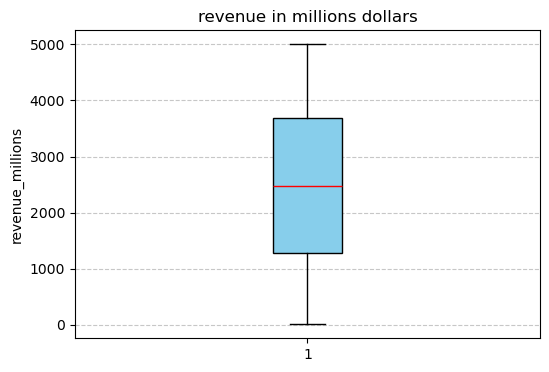

In [17]:
box_plot(df, column ="revenue_millions", title="revenue in millions dollars", color="skyblue")

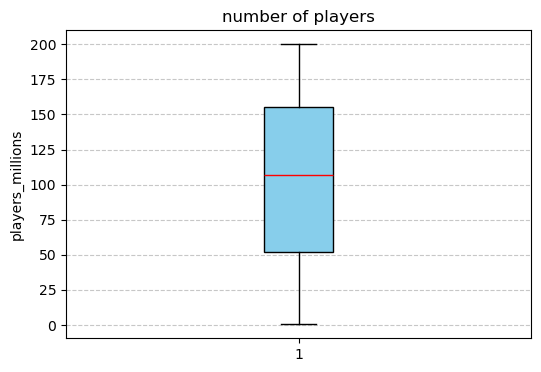

In [18]:
box_plot(df, column ="players_millions", title="number of players", color="skyblue")

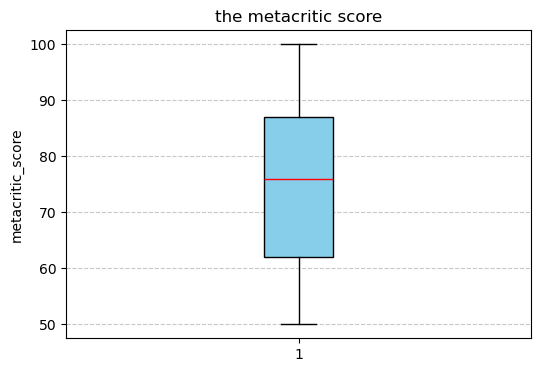

In [19]:
box_plot(df, column ="metacritic_score", title="the metacritic score", color="skyblue")

In [20]:
df = functions_Ako.index_reset(df)
df

,game_title,genre,platform,release_year,developer,revenue_millions,players_millions,metacritic_score
1,pixel odyssey 2,action,playstation,2024,square enix,1847.58,44.96,87
2,battle warriors 4,strategy,cross platform,2024,ea,4835.79,115.65,92
3,legends of valor 2,shooter,xbox,2024,square enix,2628.55,169.67,99
4,shadow realms 4,action,nintendo switch,2024,microsoft,1695.50,184.40,73
5,cyber quest 2,adventure,xbox,2024,microsoft,4529.75,17.28,91
...,...,...,...,...,...,...,...,...
996,warzone chronicles 1,horror,nintendo switch,2000,ubisoft,2654.16,174.49,53
997,zombie outbreak 3,fighting,cross platform,2000,ubisoft,2170.46,155.20,57
998,battle warriors 5,fighting,pc,2000,rockstar,2040.85,166.01,82
999,cyber quest 2,adventure,cross platform,2000,activision,2657.88,112.92,66


In [21]:
df["release_year"] = df["release_year"].astype(str)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game_title        1000 non-null   object 
 1   genre             1000 non-null   object 
 2   platform          1000 non-null   object 
 3   release_year      1000 non-null   object 
 4   developer         1000 non-null   object 
 5   revenue_millions  1000 non-null   float64
 6   players_millions  1000 non-null   float64
 7   metacritic_score  1000 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [23]:
df["release_year"] = df["release_year"].astype(str).str.strip().str.replace(" ", "")
df["release_year"] = df["release_year"].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game_title        1000 non-null   object 
 1   genre             1000 non-null   object 
 2   platform          1000 non-null   object 
 3   release_year      1000 non-null   int64  
 4   developer         1000 non-null   object 
 5   revenue_millions  1000 non-null   float64
 6   players_millions  1000 non-null   float64
 7   metacritic_score  1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


# Which companies have scores above 80 from Metacritic


In [25]:
high_score_games = df[df['metacritic_score'] > 80]
companies_above_80 = high_score_games['developer'].unique()
print(companies_above_80)

['square enix' 'ea' 'microsoft' 'bandai namco' 'nintendo' 'capcom'
 'activision' 'sony' 'rockstar' 'ubisoft']


In [26]:

high_score_games = df[df['metacritic_score'] > 80]
companies_above_80 = high_score_games['developer'].unique()
company_counts = high_score_games['developer'].value_counts()
print(company_counts)

developer
sony            47
microsoft       46
rockstar        45
square enix     44
capcom          44
ubisoft         39
activision      37
ea              35
bandai namco    34
nintendo        32
Name: count, dtype: int64


In [27]:
# calculate the mean of the compagny metacritic score
avg_scores_by_company = (
    df.groupby("developer")["metacritic_score"]
           .mean()
           .sort_values(ascending=False)
)

print(avg_scores_by_company)

developer
square enix     76.761364
capcom          76.614583
bandai namco    75.253012
rockstar        75.168224
microsoft       74.952830
sony            74.716667
ea              74.608696
activision      74.541284
nintendo        74.333333
ubisoft         73.349515
Name: metacritic_score, dtype: float64


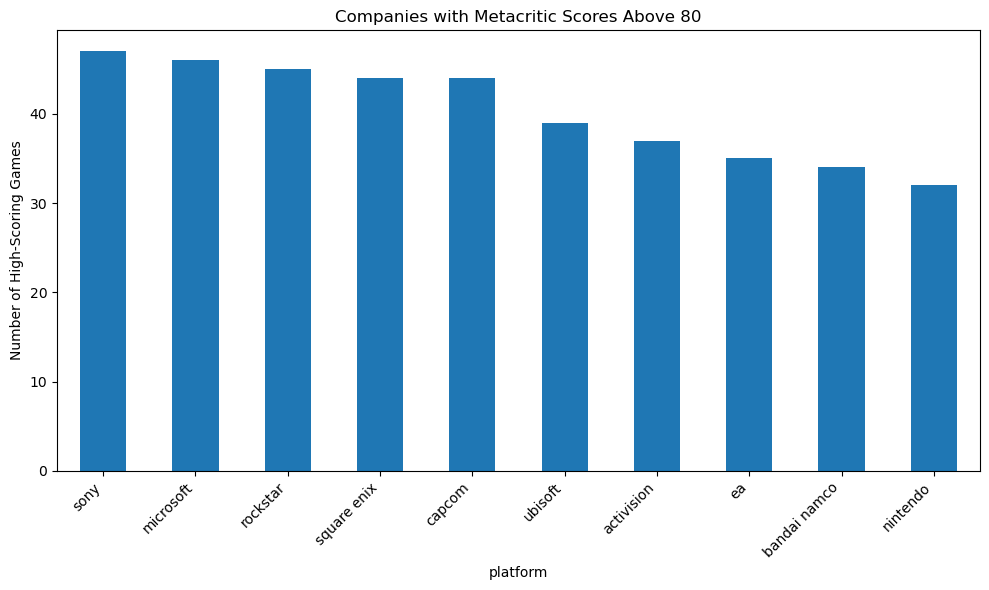

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filter games with score > 80
filtered_df = df[df["metacritic_score"] > 80]

# 2. Count the number of games of the company
company_counts = filtered_df["developer"].value_counts()

# 3. Visualization
plt.figure(figsize=(10,6))
company_counts.plot(kind='bar')
plt.title("Companies with Metacritic Scores Above 80")
plt.xlabel("platform")
plt.ylabel("Number of High-Scoring Games")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Which companies delivered the best revenue 

In [29]:
# Which companies delivered the best revenue 
# 1. Calculate the total revenue per company
top5_revenue = (
    df.groupby("developer")["revenue_millions"]
           .sum()
           .sort_values(ascending=False)
           .head(5)
)

print(top5_revenue)

developer
sony          320316.24
activision    273990.20
rockstar      259235.71
capcom        259007.30
microsoft     253175.67
Name: revenue_millions, dtype: float64


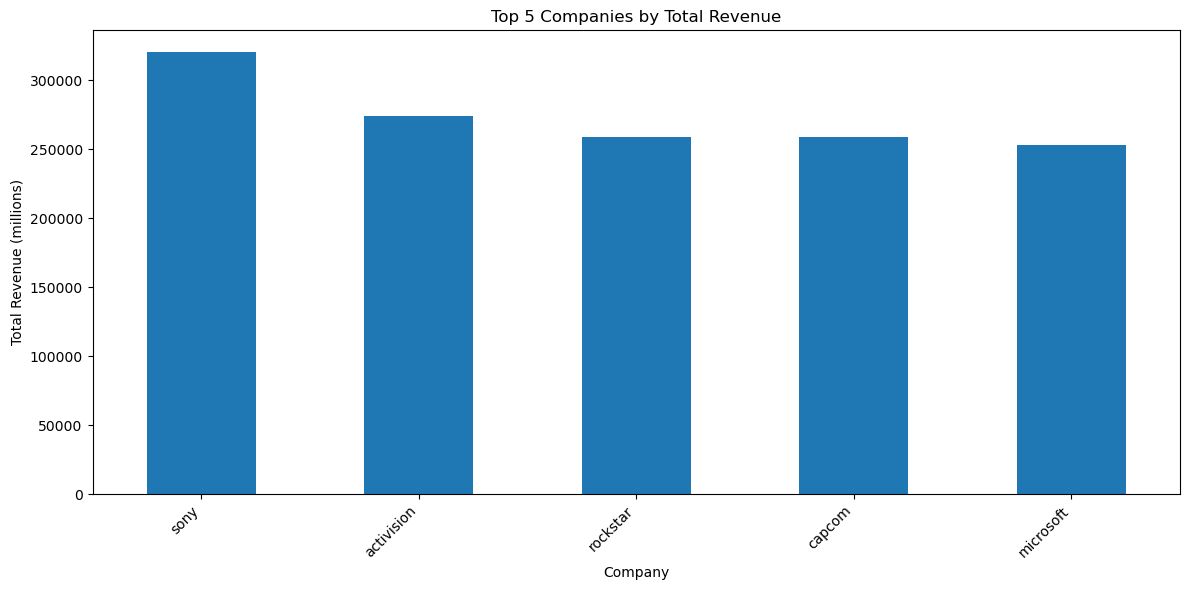

In [30]:
# Which companies delivered the best revenue 
# 1. Calculate the total revenue for each company
company_revenue = df.groupby("developer")["revenue_millions"].sum().sort_values(ascending=False)

# 2. Visualization : TOP 5
plt.figure(figsize=(12,6))
company_revenue.head(5).plot(kind='bar')
plt.title("Top 5 Companies by Total Revenue")
plt.xlabel("Company")
plt.ylabel("Total Revenue (millions)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Revenue growth over time- Davy

In [31]:
df_2021_2024 = df[(df["release_year"] >= 2021) & (df["release_year"] <= 2024)]

In [32]:
# we sort to order the revenues and calculate the growth
# calculate the total revenue per year for each company
revenue_by_year = (
    df.groupby(["developer", "release_year"])["revenue_millions"]
           .sum()
           .reset_index()
           .sort_values(["developer", "release_year"])
)

# 2. Calculate year after year growth (in %) 
revenue_by_year["revenue_growth_%"] = (
    revenue_by_year.groupby("developer")["revenue_millions"]
                   .pct_change() * 100
)

print(revenue_by_year)

      developer  release_year  revenue_millions  revenue_growth_%
0    activision          2000           8310.33               NaN
1    activision          2001           1561.73        -81.207365
2    activision          2002           7416.43        374.885544
3    activision          2003           3706.41        -50.024338
4    activision          2004           3355.88         -9.457399
..          ...           ...               ...               ...
239     ubisoft          2020           9299.87        -39.832136
240     ubisoft          2021          17405.28         87.156165
241     ubisoft          2022           3713.41        -78.665037
242     ubisoft          2023          10609.89        185.718248
243     ubisoft          2024           1170.81        -88.964919

[244 rows x 4 columns]


In [34]:
df

,game_title,genre,platform,release_year,developer,revenue_millions,players_millions,metacritic_score
1,pixel odyssey 2,action,playstation,2024,square enix,1847.58,44.96,87
2,battle warriors 4,strategy,cross platform,2024,ea,4835.79,115.65,92
3,legends of valor 2,shooter,xbox,2024,square enix,2628.55,169.67,99
4,shadow realms 4,action,nintendo switch,2024,microsoft,1695.50,184.40,73
5,cyber quest 2,adventure,xbox,2024,microsoft,4529.75,17.28,91
...,...,...,...,...,...,...,...,...
996,warzone chronicles 1,horror,nintendo switch,2000,ubisoft,2654.16,174.49,53
997,zombie outbreak 3,fighting,cross platform,2000,ubisoft,2170.46,155.20,57
998,battle warriors 5,fighting,pc,2000,rockstar,2040.85,166.01,82
999,cyber quest 2,adventure,cross platform,2000,activision,2657.88,112.92,66


In [37]:
# we sort to order the revenues and calculate the growth 
# calculate the total revenue per year for each company
revenue_by_year = (
    df.groupby(["developer", "release_year"])["revenue_millions"]
        .sum()
        .sort_values(ascending=False)
)

# 2. Calculate year after year growth (in %) 
revenue_by_year["revenue_growth_%"] = (
    revenue_by_year.groupby("developer")["revenue_millions"]
                   .pct_change() * 100
)

# 2. Visualization : TOP 5
plt.figure(figsize=(12,6))
revenue_by_year.head(5).plot(kind='bar')
plt.title("Top 5 Companies growth revenue(millions)")
plt.xlabel("Company")
plt.ylabel("Total Revenue (millions)")
plt.tight_layout()
plt.show()

KeyError: 'Column not found: revenue_millions'

In [ ]:
df

In [1]:
plt.figure(figsize=(12,6))

for company, group in revenue_by_year.groupby("developer"):
    plt.plot(group["release_year"], group["revenue_growth_%"], marker='o', label=company)

plt.title("Revenue Growth Rate (%) Over Time by Company")
plt.xlabel("Year")
plt.ylabel("Growth (%)")
plt.axhline(0, color='gray', linestyle='--')  # ligne neutre
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined